# `Feature Mapping`
### Only One step of convolution
### How does the real time features look like in general

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import VGG16  # it is a model

from numpy import expand_dims
from tensorflow.keras.applications.vgg16 import preprocess_input

553467904/553467096 [==============================] - ETA:  - 489s 1us/step


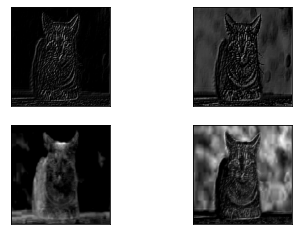

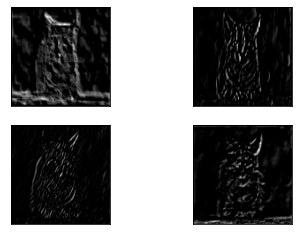

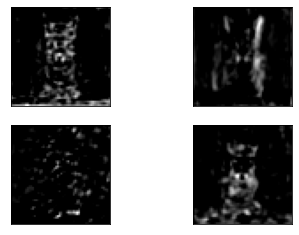

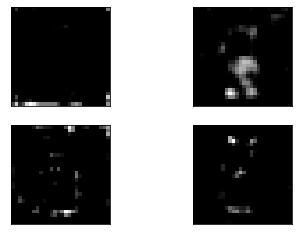

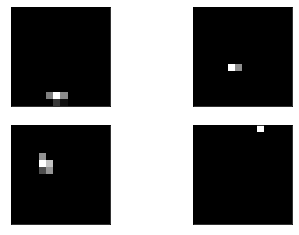

In [4]:
model = VGG16()  # pre trained model

hdlyrs = [2,5,9,13,17]   # hidden layers
outputs = [model.layers[i].output for i in hdlyrs]
model = Model(inputs=model.inputs,outputs=outputs)
img = load_img('cat.jpg',target_size=(224,224))

img = img_to_array(img) # converted to array

img = expand_dims(img,axis=0) # expanded that array

img = preprocess_input(img)   # pre-processed our input

feature_map = model.predict(img)  # predicted the image and created a feature map
square = 2

## plotting part

for fmap in feature_map:
  ix = 1
  for _ in range(square):
    for i in range(square):
      ax = plt.subplot(square,square,ix)
      ax.set_xticks([])
      ax.set_yticks([])
      plt.imshow(fmap[0,:,:,ix-1],cmap='gray')
      ix += 1
  plt.show()

In [6]:
feature_map.__len__()

5

In [12]:
print(outputs)

[<KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv2')>, <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv2')>, <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv3')>, <KerasTensor: shape=(None, 28, 28, 512) dtype=float32 (created by layer 'block4_conv3')>, <KerasTensor: shape=(None, 14, 14, 512) dtype=float32 (created by layer 'block5_conv3')>]


## `END ---------------------------------------------------`